# Houce Prices Dynamics in King County WA

## Import Necessary Liabraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

## Data

**Source:** Kaggle <br> **Link:** https://www.kaggle.com/datasets/shivachandel/kc-house-data/data <br>**Variables:** 21 (id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15) <br> **Observations:** 21.613 <br> **Period:** 02 May 2014 to 27 May 2015 <br> **Geographic coverage:** King County, including Seattle

In [2]:
# Read the dataset
df = pd.read_csv('data/kc_house_data.csv')

In [3]:
# Display the first few rows of the DataFrame
df.head()

# Get information about the DataFrame, such as column names and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  


The dataset consists of 21,613 observations (rows) and 21 variables (columns).
The variables include information such as id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, and sqft_lot15.

The id variable appears to be a unique identifier for each observation. All variables structured as numeric/integer except the date variable which is currently stored as a character type. It might be useful to convert it to a date type for time-related analyses. So we will first convert the date variable from character to a date type.

It's important to note that while all variables may be structured as numeric, certain variables, despite their numeric representation, hold categorical significance. These categorical variables are essentially numerically coded to represent different categories or levels within the dataset. This nuance is crucial to consider when interpreting and analyzing the data.


In [4]:
# Convert the 'date' variable to datetime type
df['date'] = pd.to_datetime(df['date'])

In [5]:
# Calculate summary statistics for numerical columns
df.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,2014-10-29 04:38:01.959931648,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
min,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,2014-07-22 00:00:00,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631


**id**
   - The `id` variable represents a unique identifier for each home sold.

**date**
   - The `date` variable, contains information about the date of the house sale and spans from May 2, 2014, to May 27, 2015.

**price:**
   - The `price` variable is the **dependent variable**   and shows a wide range, with the minimum house price at $75,000 and the maximum at $7,700,000.
   - The median house price is $450,000, and the mean is $540,088.

**bedrooms and bathrooms:**
   - The variables related to the number of bedrooms and bathrooms  (0.5 accounts for a room with a toilet but no shower) exhibit varying ranges and distributions.
   - The number of bedrooms ranges from 0 to 33, with a mean of approximately 3.37.
   - The number of bathrooms ranges from 0 to 8, with a mean of approximately 2.12.

**sqft_living and sqft_lot:**
   - These variables represent the size of houses.
   - `sqft_living` reflects the Square footage of the apartments interior living area, ranging from 290 to 13,540 square feet, with a mean of 2080.
   - `sqft_lot` represents the lot size, ranging from 520 to 1,651,359 square feet, with a mean of 15,107.

**floors**
 -The `floors` variable is represents the levels of the houses. The majority of houses have 1 or 1.5 floors.
   - Notably, there seems to be a common occurrence of houses with 1.5 floors, while the mean is approximately 1.494.
   - This suggests that many houses have a split-level design or additional space on an upper level, contributing to the fractional floor values.

**waterfront:**  
   - The `waterfront` variable is a dummy variable mostly 0 , represents the property has no waterfront view and 1 for with waterfront.

**view and condition:**  
   - `view` represents the overall view rating (0 to 4)  with a mean of 0.23 
   -`condition` represents the overall condition rating (0 to 5) with a mean of 3.41 for `condition`.

**grade:**
   - `grade` represents the overall grade given to the housing unit and ranges from 1 to 13 where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
   
**sqft_above, and sqft_basement:**
   - `sqft_above` and `sqft_basement` show the square footage above ground and is below ground level¶ (in the basement), respectively.

**yr_built, yr_renovated:**
   - Houses were built between 1900 and 2015 (`yr_built`), with the majority built in the mid to late 20th century.
   - `yr_renovated` indicates the last renovation year, with a mean of 84.4 and many zero values, suggesting no renovations.


**Geographical Information (lat, long, zipcode):**
   - `lat` and `long` provide latitude and longitude information of house locations, respectively.
   - `zipcode` represents the zip code of the house location.
   

**sqft_living15 and sqft_lot15:**
   - `sqft_living15` and `sqft_lot15` indicate the living room and lot size in 2015, reflecting potential renovations or changes. (? some sources mention it differently and main source couldnt find !!!)


These summary statistics provide an overview of the distribution and characteristics of each numeric variable in the dataset, with a specific focus on understanding the relationships with the **dependent variable, 'price.'**

### Missing Values

 - Most variables in the dataset have complete data; however, it's worth noting that `sqft_above` has two missing values (NA's).
   - Given the small number of missing values (only two observations) in relation to the overall dataset size, we have decided to remove these specific observations. This decision is based on considering the number of observations and the minimal impact on the overall analysis.
   - Removing these observations ensures that the dataset remains largely complete and is a reasonable approach in this context.

In [6]:
# Check for missing values in each column
missing_values = df.isnull().sum() 

# Filter missing values greater than zero
missing_values_positive = missing_values[missing_values > 0]

# Display the number of  missing values for variable that have missing values
print("#Missing values:")
print(missing_values_positive)

#Missing values:
sqft_above    2
dtype: int64


In [7]:
# Remove observations with missing values in the 'sqft_above' variable
house_data = df.dropna(subset=['sqft_above'])



### Data Exploration

In organizing our variables by type, we enhance the precision of our analysis and visualization methods. This thoughtful categorization enables us to apply tailored techniques to each variable type, ensuring more insightful and nuanced exploration of the dataset.

In [8]:
#Define variables according to their types

# All variables
all_vars = ["id", "bathrooms", "bedrooms", "condition", "date", "floors", "grade", "lat", "long", "price", "sqft_above", "sqft_basement", "sqft_living", "sqft_living15", "sqft_lot", "sqft_lot15", "view", "waterfront", "yr_built", "yr_renovated", "zipcode"]

# Continuous Numeric Variables
cont_vars = ["price", "sqft_living", "sqft_living15", "sqft_lot", "sqft_lot15", "sqft_above", "sqft_basement"]

# Discrete Numeric Variables
disc_vars = ["bedrooms", "floors", "bathrooms"]

# Categorical Variables
cat_vars = ["waterfront", "view", "condition", "grade"]

# Date Variables
date_vars = ["date", "yr_built", "yr_renovated"]

# Geographical Variables
geo_vars = ["lat", "long", "zipcode"]




### Exploratory Data Analysis (EDA)

In this script, we import necessary data handling and visualization libraries such as pandas, numpy, matplotlib, and seaborn. The script changes the default number formatting setting in pandas to prevent scientific notation and increase precision. It proceeds to perform a correlation analysis on a given dataframe, 'df', and outputs a correlation matrix. It also visualizes this matrix using a heat map for better readability and interpretation. 

#### Distribution of Continuous Numeric Variables

The script initially sets up a grid layout for multiple subplots, which would include histograms, density plots for each numerical attribute.

A histogram gives an overview of the distribution of the numerical attribute, the density plot superimposed on the histogram shows the empirical density of the distribution, 

On visual inspection, the right-skewed/year non-normal distributions of these variables may suggest the presence of outliers caused by luxurious or unique properties. Instead of removing or transforming these outliers, we propose the use of robust statistical methods for further analysis, which are designed for handling outliers effectively. This allows for a more reliable analysis, acknowledging the presence of these high-end properties without them disproportionately impacting the results.

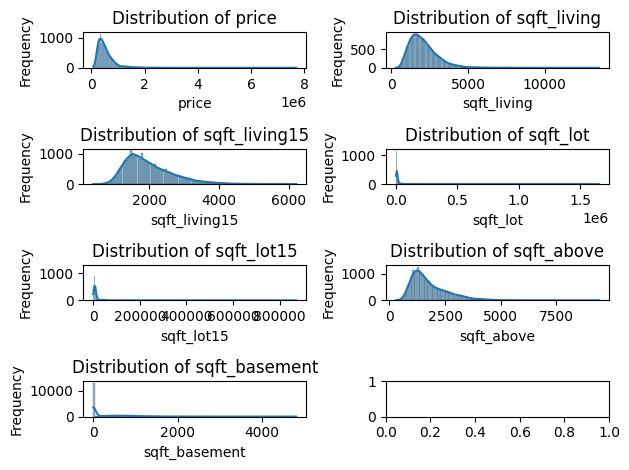

In [9]:
# Continuous Numeric Variables
fig, axes = plt.subplots(4, 2)

for i, var in enumerate(cont_vars):
    sns.histplot(data=house_data, x=var, kde=True, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'Distribution of {var}')
    axes[i // 2, i % 2].set_xlabel(var)
    axes[i // 2, i % 2].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


#### Distribution of Discrete Numeric Variables

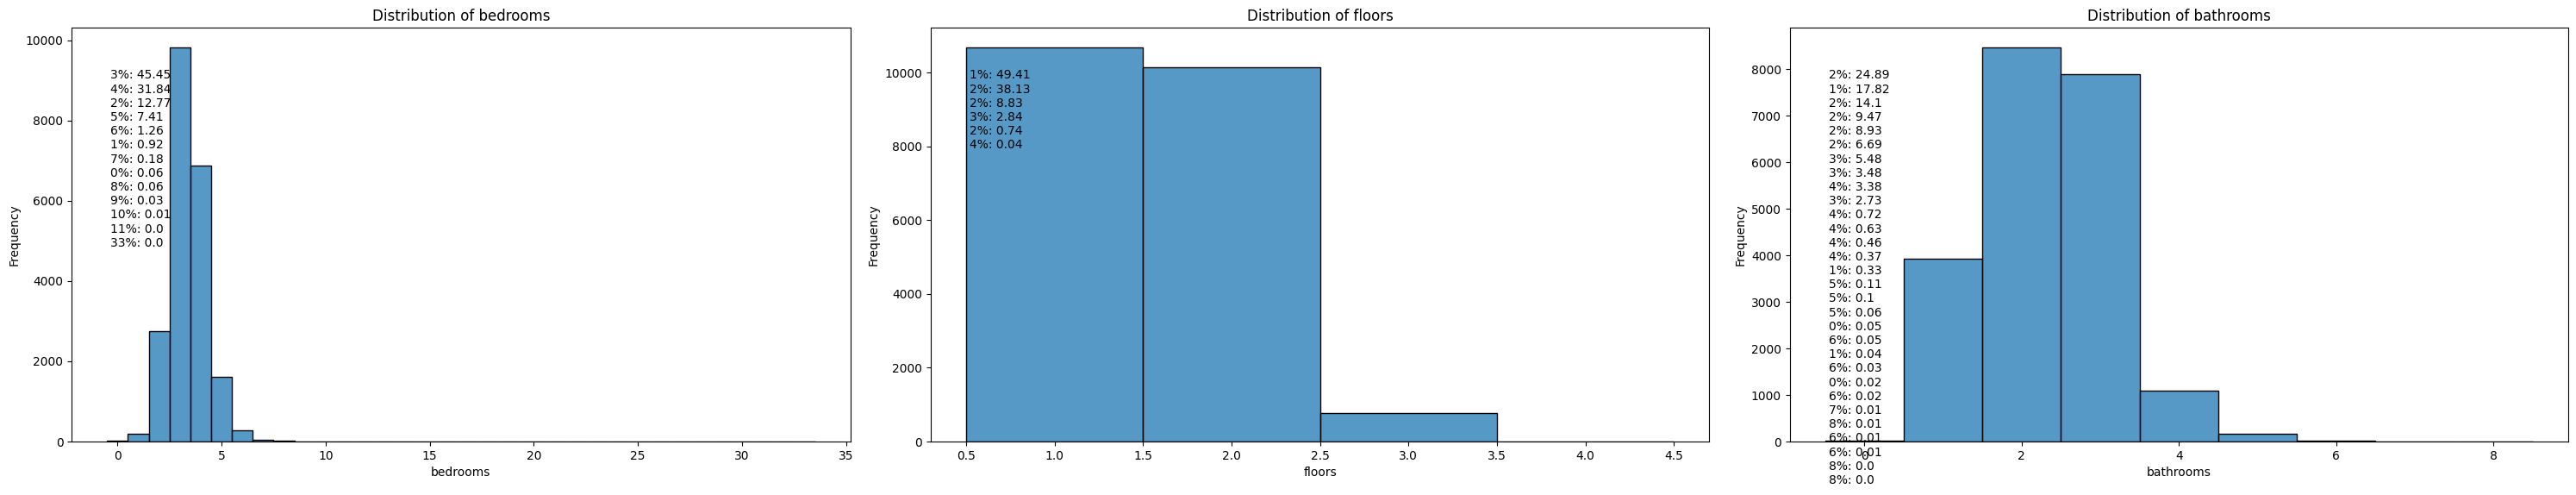

In [10]:
# Discrete Numeric Variables
fig, axes = plt.subplots(1, 3, figsize=(30, 6))

for i, var in enumerate(disc_vars):
    sns.histplot(data=house_data, x=var, kde=False, discrete=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {var}')

    # Calculate percentage distribution
    perc_distribution = (house_data[var].value_counts(normalize=True) * 100).round(2)

    # Format percentage distribution string
    perc_str = '\n'.join([f'{val:.0f}%: {count}' for val, count in zip(perc_distribution.index, perc_distribution)])
    axes[i].text(0.05, 0.9, perc_str, transform=axes[i].transAxes, fontsize=10, verticalalignment='top')

    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()




Bedrooms :

The distribution of bedrooms in the dataset reveals a clear preference for houses with 3 bedrooms, constituting nearly half of the entries (45.5%). 4-bedroom homes follow closely with 31.8%, and 2 and 5-bedroom configurations are also prevalent, making up 12.8% and 7.4%. However, 0-bedroom and 1-bedroom houses have notably lower percentages with approximately 0.1% and 0.9%, respectively. The distribution is positively skewed, with a peak around 3 bedrooms.

Bathrooms Configuration:

The dataset showcases a diverse distribution of bathrooms. Houses with 2.5 bathrooms are most common, representing 24.9%. Additionally, 1 bathroom and 1.75 bathrooms are prevalent at 17.8% and 14.1%, respectively. The distribution exhibits multiple peaks, suggesting a variety of bathroom count configurations in the dataset.

In the United States, bathrooms are generally categorized as master bathroom, containing a varied shower and a tub that is adjoining to a master bedroom, a "full bathroom" (or "full bath"), containing four plumbing fixtures: bathtub/shower, or (separate shower), toilet, and sink; "half (1/2) bath" (or "powder room") containing just a toilet and sink; and "3/4 bath" containing toilet, sink, and shower, although the terms vary from market to market. In some U.S. markets, a toilet, sink, and shower are considered a "full bath". (wikipedia)

Floor Counts:

When considering the number of floors, Houses with 1 floor are predominant, making up 49.4% of the dataset. 2 floors houses follow closely at 38.1%, with 1.5 floors representing 8.8%. The distribution is skewed towards fewer floors, with a sharp decline for houses with more than 2 floors.

Note on 0 Values:

In the context of houses requiring bedrooms and bathrooms, the presence of 0 values in these categories may indicate missing or incomplete data. It's uncommon for a house to have zero bedrooms or bathrooms. Investigating and addressing the reasons behind these zero values is crucial for ensuring the quality and accuracy of the dataset, as well as the reliability of any analyses conducted.



#### Distribution of Categorical  Variables

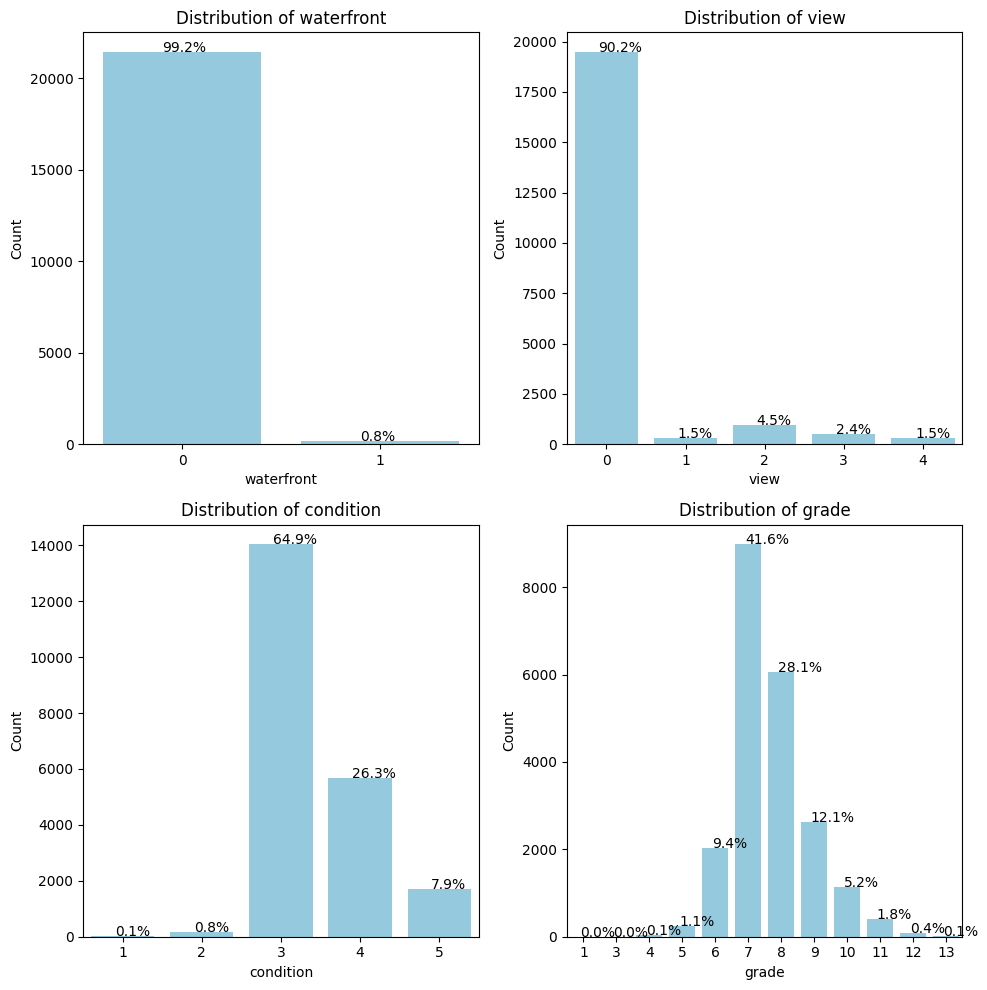

In [11]:
# Initialize a subplot grid
n = len(cat_vars)
ncols = 2
nrows = n // ncols if n % ncols == 0 else n // ncols + 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10), dpi=100)

for i, cat in enumerate(cat_vars):
    # Convert categorical variables to factors
    house_data_copy = house_data.copy()
    house_data_copy[cat] = house_data_copy[cat].astype('category')

    # Create bar plots for categorical variables using Seaborn
    ax = axes[i // ncols, i % ncols]
    sns.countplot(x=cat, data=house_data_copy, ax=ax, color='skyblue')

    # Add percentage labels on top of each bar
    total = len(house_data_copy[cat])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2 - 0.1
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size=10)

    ax.set_title(f"Distribution of {cat}")
    ax.set_ylabel('Count', fontsize=10)
    ax.set_xlabel(f'{cat}', fontsize=10)

# remove empty subplots
if n % ncols != 0:
    for idx in range(n, nrows * ncols):
        fig.delaxes(axes.flatten()[idx])

plt.tight_layout()
plt.show()


Out of all observations, only 1 percent of houses are located on the waterfront.

Additionally, the majority of houses (90.2%) have a view score of 0. Among the remaining view scores, 4.5% have a score of 2, while scores of 1 and 4 each account for 1.5%. The remaining 2.4% of houses have a view score of 3. we observed that the 'view' variable predominantly contained 0 values, suggesting that many houses had not been viewed. In response, we decided to engineer a new feature named 'viewed' to capture this information more explicitly. The 'viewed' variable takes on a value of 1 if the house has been viewed and 0 otherwise.



In [12]:
# Create a copy of the DataFrame
house_data2 = house_data.copy()

# Create a new variable 'viewed' with value 1 if 'view' is not 0, and 0 otherwise
house_data2['viewed'] = np.where(house_data['view'] != 0, 1, 0)

# Drop the original 'view' variable
house_data2.drop(columns=['view'], inplace=True)

# Categorical Variables
cat_vars = ["waterfront", "viewed", "condition", "grade"]


The majority of houses in the dataset are in good to average condition. Approximately 91.7% of houses fall within Condition 3, indicating that a significant portion of the properties is well-maintained.Condition 4 homes represent 26.3%, suggesting a sizable proportion of houses are in better-than-average condition. Meanwhile, Condition 5 homes, which likely denote excellent condition, constitute 7.9% of the dataset.

The distribution of grades reflects a diverse range of housing quality. A significant portion of houses falls within Grade 7 (41.6%) and Grade 8 (28.1%), indicating properties with a higher level of construction and design. Grades 9 and 10 together contribute 17.3%, highlighting a considerable proportion of houses with superior construction and design quality.The dataset includes a limited number of houses with lower grades (1-6), with most grades in this range having negligible representation (close to 0%).The distribution is skewed towards higher grades, emphasizing the prevalence of houses with above-average construction and design quality in the dataset.


### Handling Zero Values in Bedroom & Bathroom 

In [13]:
# Create a copy of the DataFrame
house_data2 = house_data2.copy()

def impute_nonzero(var):
  '''
  A function to impute missing values using the median of non-zero values
  '''
  non_zero_values = var[var != 0]
  if non_zero_values.size > 0:
    imputed_value = non_zero_values.median()
    var.loc[var == 0] = imputed_value
  return var


# Apply the imputation function to bedrooms and bathrooms
house_data2['bedrooms'] = impute_nonzero(house_data2['bedrooms'])
house_data2['bathrooms'] = impute_nonzero(house_data2['bathrooms'])

C:\Users\CASPER\AppData\Local\Temp\ipykernel_15724\3062107584.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var.loc[var == 0] = imputed_value
C:\Users\CASPER\AppData\Local\Temp\ipykernel_15724\3062107584.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var.loc[var == 0] = imputed_value


### Correlation Analysis

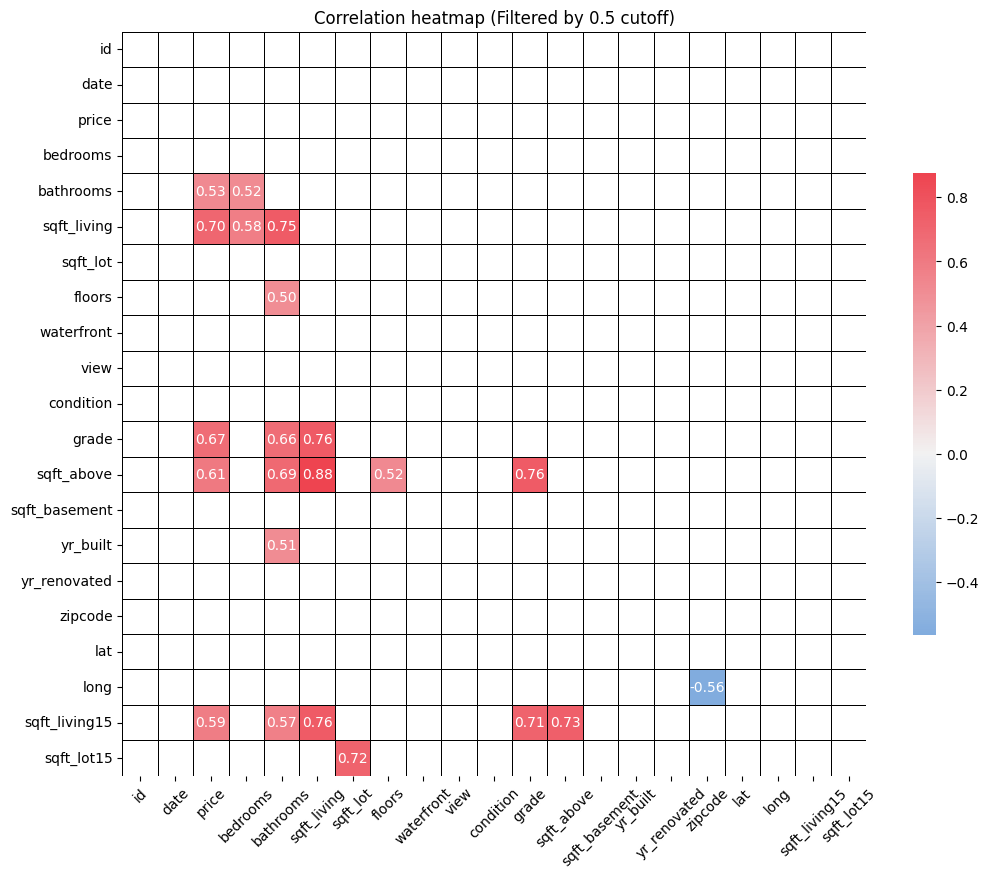

In [14]:
# Calculate correlation for all variables
cor_matrix = house_data.corr()

# Filter the correlation matrix by cutoff value
cutoff = 0.5
cor_matrix_filtered = cor_matrix[(cor_matrix.abs() >= cutoff) & (cor_matrix != 1)]

# Create a mask to hide the upper triangle of the correlation matrix (which is symmetric)
mask = np.triu(np.ones_like(cor_matrix_filtered, dtype=bool))

# Plot heatmap with the mask
plt.figure(figsize=(12,12))
cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True) # generate colors for the heatmap
sns.heatmap(cor_matrix_filtered, mask=mask, center=0, annot=True, fmt=".2f", 
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, cmap=cmap, linecolor='black')
plt.xticks(rotation=45)
plt.title(f"Correlation heatmap (Filtered by {cutoff} cutoff)")
plt.show()


Initially, we constructed a correlation matrix to discern relationships among variables in the dataset. To enhance interpretability, we applied a filter, selecting correlations with an absolute value greater than 0.5. This focused approach facilitates easier interpretation by highlighting strong correlated variables. 
The choice of the cutoff level for correlation analysis depends on the specific goals of the analysis and the nature of the data. Commonly used cutoff values for correlation coefficients between 0.5-0.7 for moderate correlation and above 0.7 for strong correlation. Eventhough we in the begging chooses 0.7 cutoff , the results showed that The price variable stands out with a strong positive correlation of 0.70 with only the square footage of living space (sqft_living). While this suggests a notable linear relationship between these two factors,we recognized it may be beneficial to also consider variables with moderate correlations to price, as they could provide additional insights into determinants of house prices beyond just living space. So we decreased the cutoff level according that.


According to final results (with 0.5 cutoff):

The Price (dependent variable): Strongly correlated with the square footage of living space (sqft_living)  at 0.70, indicating that larger living spaces tend to command higher prices. And also having moderate correlation with other features such as bathrooms (0.53), sqft_above(0.61), sqft_living15(0.59) and grade(0.67)

The number of bathroom (bathrooms) have strong correlation with only sqft_living(0.75), also having moderate correlation with multiple variables ; price(0.53), bedrooms(0.52), floors (0.5), sqft_above(0.69),sqft_living15 (0.57), grade (0.66),sqft_living15 (0.51)

The square footage of living space (sqft_living) demonstrates strong positive correlations with price (0.70), bathrooms (0.75), sqft_above (0.88), sqft_living15 (0.76), and grade (0.76), highlighting its multifaceted influence on house features and value. and it have moderate correlation with  bedroom (0.58) 

The square footage above ground (sqft_above) has the highest correlation with sqft_living (0.88) and substantial correlations with sqft_living15 (0.73) and grade (0.76), And it have moderate correlation with price (0.61), bathroom (0.69) and floors (0.52) underscoring its significance in determining overall property grades.


The overall grade (grade) exhibits a strong positive correlation with various measures of house size, including sqft_living (0.76), sqft_above (0.76), and sqft_living15 (0.71). Additionally, it shows a moderate correlation with price (0.67) and bathrooms (0.66), suggesting that houses with higher grades tend to be larger, have more bathrooms, and command higher prices.


In conclusion, the correlation analysis has uncovered intricate relationships among various features in the dataset, emphasizing the strong correlation of house prices with the square footage of living space (sqft_living). Additionally, moderate correlations with other features such as bathrooms (0.53), sqft_above (0.61), sqft_living15 (0.59), and grade (0.67) suggest the presence of diverse factors influencing property values, warranting further in-depth analysis in later stages.

Moreover, the identified potential multicollinearity issue highlights the need for careful feature selection to enhance the stability and interpretability of the regression model. Specifically, considering the strong correlations among Sqft_living, Sqft_living15, and Sqft_above, it is advisable to include only one of them in the model to avoid multicollinearity and ensure the model's robustness.

In addition it's crucial to remember that correlation does not imply causation. While these variables are correlated, further analysis and domain knowledge are needed to understand the causal relationships and make informed predictions.

As we move forward, advanced visualizations will serve as valuable tools to unravel these complex relationships, offering a more nuanced understanding of the dynamics shaping the real estate market in King County, Washington State, USA.


Feature Selection: Given the multicollinearity observed among sqft_living, sqft_living15, and sqft_above, we select one of these variables that best represents the living space in the model. For our case, sqft_living has a strong correlation with the target variable price and other predictors, making it a suitable choice.


## Advanced Visualization Techniques

### Scatter plots 

#### Continuous variables vs. "Price"


The scatter plots collectively underscore similarities in the distribution patterns of all continuous variables concerning price. This graphical exploration enhances the understanding of the correlation between each continuous variable and housing prices, with the filter for prices drawing attention to three potential outliers. Identifying and comprehending such outliers is crucial for robust data analysis, aiding in informed decisions regarding their impact on statistical models and subsequent analyses. Further investigation and domain knowledge are typically required to interpret these outliers within the dataset's context.

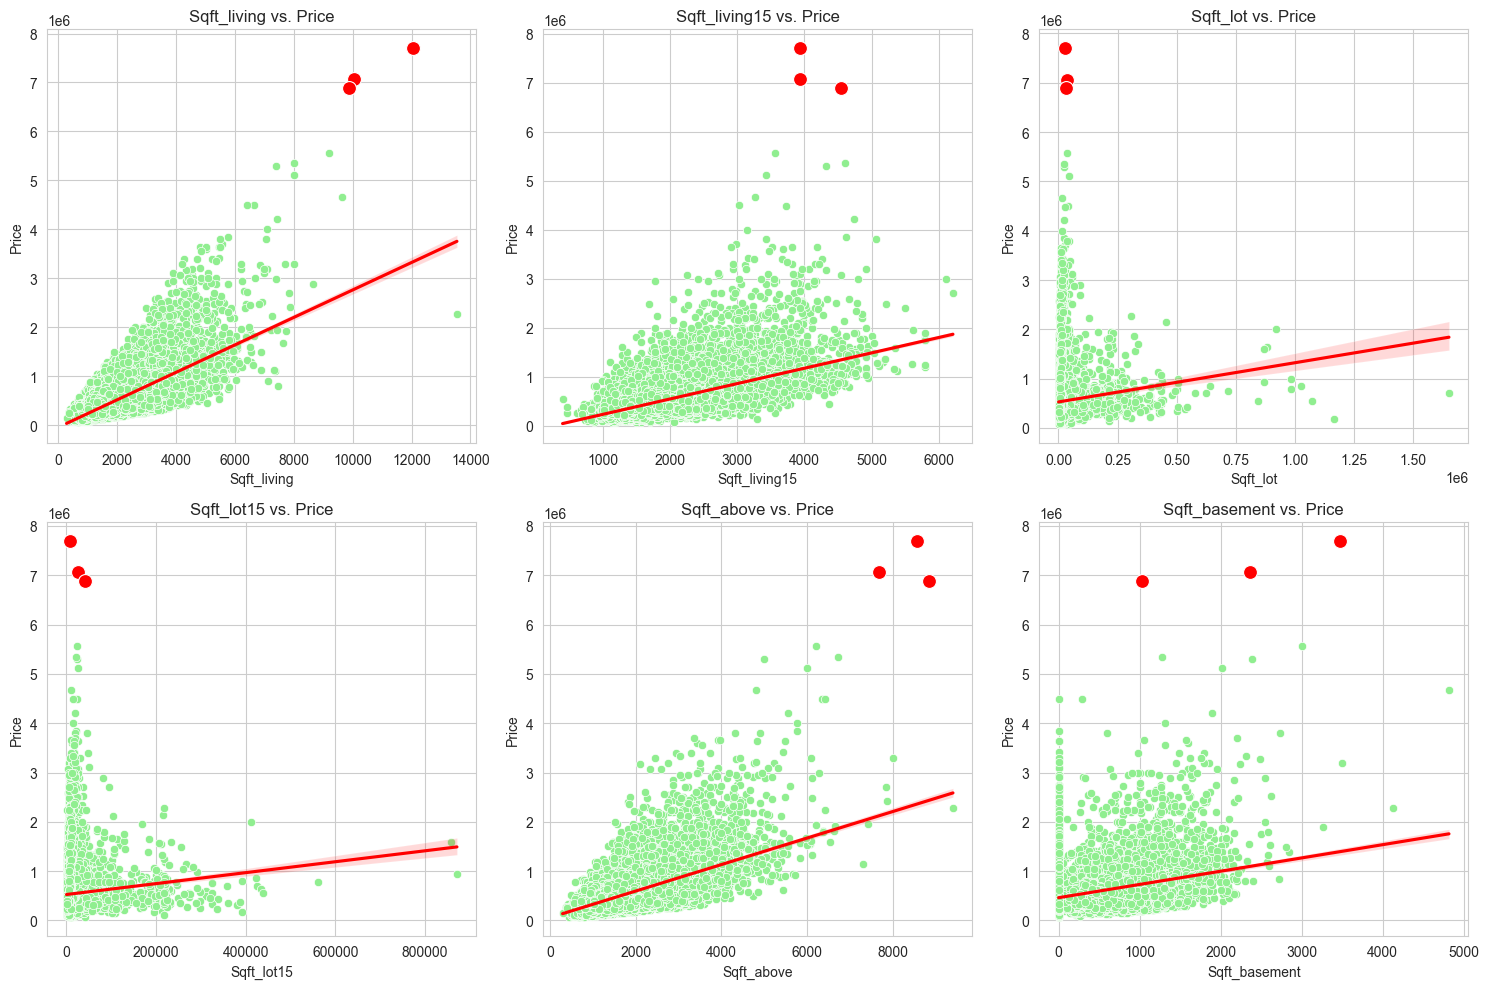

The scatter plots collectively underscore similarities in the distribution patterns of all continuous variables concerning price. This graphical exploration enhances the understanding of the correlation between each continuous variable and housing prices, with the filter for prices drawing attention to three potential outliers. 


In [20]:
import seaborn as sns

# Set the style
sns.set_style("whitegrid")

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the axes array to iterate over each subplot
axes = axes.flatten()

exception_var = "price"

# Counter for the index of axes array
plot_index = 0

for var in cont_vars:
    if var != exception_var:
        # Scatter plot
        sns.scatterplot(x=var, y='price', data=house_data, color='lightgreen', ax=axes[plot_index])
        
        # Add regression line
        sns.regplot(x=var, y='price', data=house_data, scatter=False, color='red', ax=axes[plot_index])
        
        # Highlight observations where housing prices exceed $6,000,000 with a red circle
        outliers = house_data[house_data['price'] > 6000000]
        sns.scatterplot(x=outliers[var], y=outliers['price'], color='red', marker='o', s=100, ax=axes[plot_index])
        
        # Set plot title and labels
        axes[plot_index].set_title(f'{var.capitalize()} vs. Price')
        axes[plot_index].set_xlabel(var.capitalize())
        axes[plot_index].set_ylabel('Price')
        
        # Increment plot index
        plot_index += 1

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()
